# Exercise 4: The XOR Problem & The First AI Winter
## Why do we need "Deep" Learning?

In the early days of AI (1950s), the **Perceptron** was invented. The New York Times reported it would be "the embryo of an electronic computer that [will] be able to walk, talk, see, write, reproduce itself and be conscious."

However, in 1969, a book titled *Perceptrons* mathematically proved a fatal flaw: single-layer AI cannot solve non-linear problems (like the XOR logic gate). This realization contributed to the **First AI Winter**.

In this notebook, we will recreate that historical failure and the modern solution.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from matplotlib.colors import ListedColormap

# 1. Define the Logic Gates Data
# Inputs (X) and Outputs (y)

# AND Gate (Both must be 1)
X_and = [[0,0], [0,1], [1,0], [1,1]]
y_and = [0, 0, 0, 1]

# OR Gate (At least one must be 1)
X_or = [[0,0], [0,1], [1,0], [1,1]]
y_or = [0, 1, 1, 1]

# XOR Gate (Exclusive OR - Only one must be 1, not both)
X_xor = [[0,0], [0,1], [1,0], [1,1]]
y_xor = [0, 1, 1, 0]

def plot_decision_boundary(model, X, y, title):
    X = np.array(X)
    y = np.array(y)

    # Create a mesh grid to plot the decision boundary
    h = 0.02
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict for every point in the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

    # Plot the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=100, cmap=ListedColormap(['#FF0000', '#0000FF']))
    plt.title(title)
    plt.xlabel('Input A')
    plt.ylabel('Input B')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

### Part 1: The Early Success (AND / OR)
The Perceptron works by drawing a straight line to separate the classes. For AND and OR gates, this is easy.

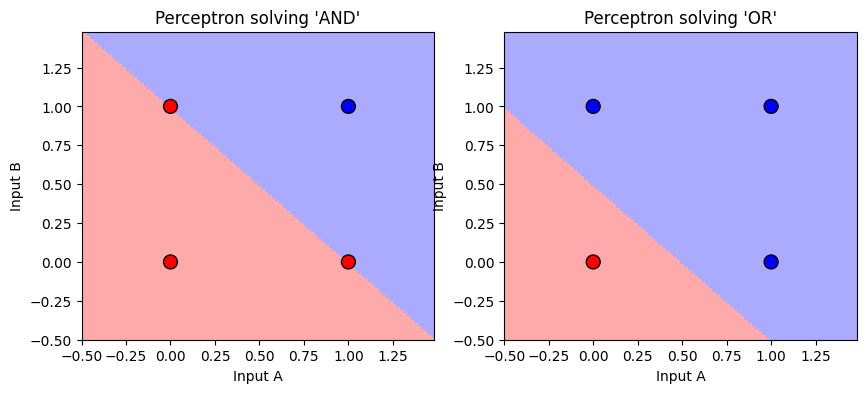

In [2]:
plt.figure(figsize=(10, 4))

# Train Perceptron on AND
clf_and = Perceptron(tol=1e-3, random_state=0)
clf_and.fit(X_and, y_and)

plt.subplot(1, 2, 1)
plot_decision_boundary(clf_and, X_and, y_and, "Perceptron solving 'AND'")

# Train Perceptron on OR
clf_or = Perceptron(tol=1e-3, random_state=0)
clf_or.fit(X_or, y_or)

plt.subplot(1, 2, 2)
plot_decision_boundary(clf_or, X_or, y_or, "Perceptron solving 'OR'")

plt.show()

**Observation:** Notice how a single straight line (the boundary between Red and Blue) easily separates the dots. This gave researchers in the 50s huge confidence.

### Part 2: The Failure (XOR)
The Exclusive OR (XOR) is true if Input A is 1 OR Input B is 1, but *not* both.
* (0,0) -> 0 (Red)
* (0,1) -> 1 (Blue)
* (1,0) -> 1 (Blue)
* (1,1) -> 0 (Red)

Can a single straight line separate the Blue dots from the Red dots?

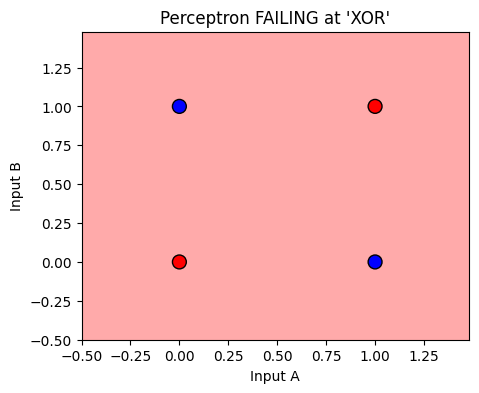

In [3]:
plt.figure(figsize=(5, 4))

# Train Perceptron on XOR
clf_xor = Perceptron(tol=1e-3, random_state=0)
clf_xor.fit(X_xor, y_xor)

plot_decision_boundary(clf_xor, X_xor, y_xor, "Perceptron FAILING at 'XOR'")
plt.show()

**Observation:** It is impossible. No matter where you draw a straight line, you cannot separate the red dots from the blue dots. The model fails completely (accuracy ~50%).

This is the **Linear Separability** problem. This failure caused the AI Winter.

### Part 3: The Solution (Deep Learning)
To solve this, we need **Hidden Layers**. This transforms the input space, allowing for non-linear decision boundaries.

We will switch from `Perceptron` (1 layer) to `MLPClassifier` (Multi-Layer Perceptron).

/home/mantunes/git/aiml-society/venv/lib64/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


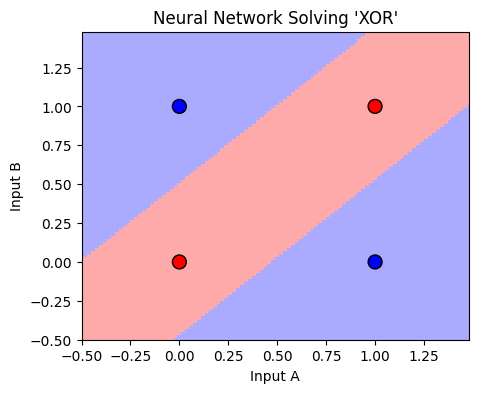

In [4]:
plt.figure(figsize=(5, 4))

# Train Multi-Layer Perceptron (Neural Network) on XOR
# hidden_layer_sizes=(4,): One hidden layer with 4 neurons
# max_iter=2000: Give it enough time to learn
clf_mlp = MLPClassifier(hidden_layer_sizes=(4,), activation='relu', max_iter=2000, random_state=1)
clf_mlp.fit(X_xor, y_xor)

plot_decision_boundary(clf_mlp, X_xor, y_xor, "Neural Network Solving 'XOR'")
plt.show()

**Observation:** Success! The Neural Network (Deep Learning) learned a complex, curved boundary to capture the pattern.

**Key Takeaway for Session 1:**
* **Narrow AI (Linear):** Fast, simple, but fails at complex relationships.
* **Deep Learning:** Computationally expensive, "Black Box", but can solve complex, non-linear problems.